### Multiclass prediction of music genres

In [1]:
import pandas as pd
import itertools
import numpy 
import sklearn
import matplotlib.pyplot as plt
import scipy 

from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.svm import SVC

In [2]:
data_set=pd.read_csv('data_set.csv',index_col=False)
GENRES=['METAL', 'CLASSICAL', 'HIPHOP', 'BLUES', 'POP', 'REGGAE']

number_of_rows,number_of_cols = data_set.shape
data_set[:5].style

,meanZCR,stdZCR,meanSpecCentroid,stdSpecCentroid,meanSpecContrast,stdSpecContrast,meanSpecBandwidth,stdSpecBandwidth,meanSpecRollof,stdSpecRollof,meanMFCC_1,stdMFCC_1,meanMFCC_2,stdMFCC_2,meanMFCC_3,stdMFCC_3,meanMFCC_4,stdMFCC_4,meanMFCC_5,stdMFCC_5,meanMFCC_6,stdMFCC_6,meanMFCC_7,stdMFCC_7,meanMFCC_8,stdMFCC_8,meanMFCC_9,stdMFCC_9,meanMFCC_10,stdMFCC_10,meanMFCC_11,stdMFCC_11,meanMFCC_12,stdMFCC_12,meanMFCC_13,stdMFCC_13,genre
0,-0.45181,-0.784343,-0.381408,-0.691147,-0.0931141,0.371373,-0.193567,-0.572264,-0.236668,-0.455356,0.151288,-0.734165,-0.142672,-0.458952,0.286323,-0.543969,-0.127472,-0.543927,0.353179,-0.56626,-0.453191,-0.498744,0.455135,-0.220863,-0.306257,-0.394531,0.0908564,-0.114378,-0.174782,-0.734013,0.379757,-0.826864,0.0651917,-0.802478,0.337965,-0.644471,blues
1,-0.766532,-0.726759,-0.559681,-0.463433,-0.20218,0.294939,-0.145536,-0.41469,-0.333817,0.018836,0.0865551,-0.609341,0.296721,-0.224597,0.261529,-0.379317,0.212097,-0.245181,0.436715,-0.48145,-0.109102,0.835014,0.662994,-0.0824327,-0.0749604,0.315861,0.0673463,0.10346,0.112254,-0.627408,0.466185,-0.771852,0.270596,-0.480038,0.389865,-0.57946,blues
2,-0.545253,-0.556617,-0.500726,-0.520669,0.128482,0.363542,-0.359306,-0.704373,-0.413241,-0.486896,0.281628,-0.319524,-0.169322,-0.418214,0.121628,-0.505016,-0.3753,-0.379773,0.508914,-0.455881,-0.386862,-0.00441049,0.233059,0.401809,-0.285252,-0.558501,-0.141825,-0.166338,-0.354216,-0.681266,0.180107,-0.752063,-0.0944673,-0.64745,-0.17509,-0.563352,blues
3,-0.936791,-0.92013,-0.872967,-0.743929,-0.0547677,0.0597105,-0.644347,-0.596014,-0.772659,-0.550906,0.490271,-0.582568,0.199112,-0.473559,0.0113278,-0.68076,0.255872,-0.485204,0.0788462,-0.511825,0.243764,-0.484566,0.248491,-0.4121,0.362862,-0.513088,-0.030966,-0.747465,0.293044,-0.794058,0.104992,-0.926054,0.20296,-0.847504,-0.0946338,-0.745549,blues
4,-0.118511,-0.400993,-0.236112,-0.243814,0.209286,0.2909,-0.317266,-0.532099,-0.198146,-0.129946,0.0676723,0.0503651,-0.286025,-0.536535,-0.0118803,-0.327846,-0.822026,-0.351386,0.229164,-0.184887,-0.736596,-0.0564981,0.024575,0.295925,-0.456353,-0.0604168,-0.253022,0.135571,-0.436034,-0.689106,-0.180337,-0.717713,0.166494,-0.222193,-0.397821,-0.306621,blues


In [3]:
from sklearn.model_selection import train_test_split

data_set_values=numpy.array(data_set)

train, test = train_test_split(data_set_values, test_size = 0.20,random_state=2,
                              stratify=data_set_values[:,number_of_cols-1])

train_x=train[:,:number_of_cols-1]
train_y=train[:,number_of_cols-1]

test_x=test[:,:number_of_cols-1]
test_y=test[:,number_of_cols-1]

print("Training data size: {}".format(train.shape))
print("Test data size: {}".format(test.shape))

Training data size: (480, 37)
Test data size: (120, 37)


In [4]:
def confusion_matrix(cm, classes,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
   
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = numpy.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

def plot_cnf(model,dataset_x,dataset_y,GENRES):
    true_y=dataset_y
    true_x=dataset_x
    pred=model.predict(true_x)

    print("---------------PERFORMANCE ANALYSIS FOR THE MODEL----------------\n")

    print("Real Test dataset labels: \n{}\n".format(true_y))
    print("Predicted Test dataset labels: \n{}".format(pred))

    cnf_matrix=sklearn.metrics.confusion_matrix(true_y,pred)
    plt.figure()
    a=confusion_matrix(cnf_matrix,classes=GENRES,title='Confusion matrix')

We use several machine learning algorithms to make classification.

Algorithms used:
 K-Nearest Neighbor
 Random Forest
 Support Vector Machine
 Neural Network

Application of KNN algorithm and its performance analysis

Max Accuracy is 0.783 on test dataset with 5 neighbors.

Training Score: 0.846
Test score: 0.783
---------------PERFORMANCE ANALYSIS FOR THE MODEL----------------

Real Test dataset labels: 
['blues' 'blues' 'reggae' 'blues' 'hiphop' 'classical' 'classical' 'metal'
 'pop' 'metal' 'reggae' 'blues' 'classical' 'hiphop' 'blues' 'classical'
 'pop' 'hiphop' 'classical' 'classical' 'blues' 'hiphop' 'pop' 'hiphop'
 'hiphop' 'reggae' 'reggae' 'metal' 'reggae' 'blues' 'reggae' 'blues'
 'hiphop' 'metal' 'classical' 'pop' 'hiphop' 'reggae' 'classical'
 'classical' 'pop' 'classical' 'reggae' 'reggae' 'pop' 'metal' 'pop'
 'classical' 'metal' 'metal' 'hiphop' 'reggae' 'classical' 'classical'
 'metal' 'pop' 'metal' 'classical' 'classical' 'pop' 'reggae' 'pop'
 'blues' 'reggae' 'reggae' 'metal' 'metal' 'blues' 'reggae' 'metal'
 'hiphop' 'pop' 'reggae' 'classical' 'pop' 'blues' 'hiphop' 'metal'
 'hiphop' 'blues' 'reggae' 'classical' 'blues' 'metal' 'reggae' 'reggae'
 'classical' 'blues' 'pop' 'metal' '

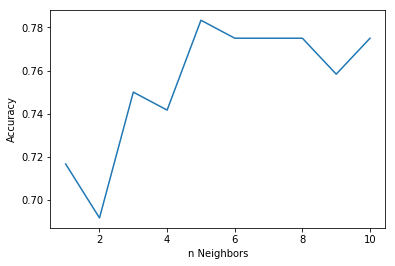

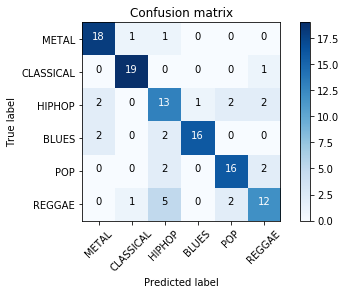

In [5]:
results_knn=[]
for i in range(1,11):
    knn=KNeighborsClassifier(n_neighbors=i)
    knn.fit(train_x,train_y)
    results_knn.append(knn.score(test_x,test_y))
    
max_accuracy_knn=max(results_knn)
best_k=1+results_knn.index(max(results_knn))
print("Max Accuracy is {:.3f} on test dataset with {} neighbors.\n".format(max_accuracy_knn,best_k))

plt.plot(numpy.arange(1,11),results_knn)
plt.xlabel("n Neighbors")
plt.ylabel("Accuracy")


knn=KNeighborsClassifier(n_neighbors=best_k)
knn.fit(train_x,train_y)
print("Training Score: {:.3f}".format(knn.score(train_x,train_y)))
print("Test score: {:.3f}".format(knn.score(test_x,test_y)))  

plot_cnf(knn,test_x,test_y,GENRES)

Application of Random Forest algorithm and its performance analysis

Max Accuracy is 0.800 on test dataset with 19 estimators.

Training Score: 1.000
Test score: 0.800
---------------PERFORMANCE ANALYSIS FOR THE MODEL----------------

Real Test dataset labels: 
['blues' 'blues' 'reggae' 'blues' 'hiphop' 'classical' 'classical' 'metal'
 'pop' 'metal' 'reggae' 'blues' 'classical' 'hiphop' 'blues' 'classical'
 'pop' 'hiphop' 'classical' 'classical' 'blues' 'hiphop' 'pop' 'hiphop'
 'hiphop' 'reggae' 'reggae' 'metal' 'reggae' 'blues' 'reggae' 'blues'
 'hiphop' 'metal' 'classical' 'pop' 'hiphop' 'reggae' 'classical'
 'classical' 'pop' 'classical' 'reggae' 'reggae' 'pop' 'metal' 'pop'
 'classical' 'metal' 'metal' 'hiphop' 'reggae' 'classical' 'classical'
 'metal' 'pop' 'metal' 'classical' 'classical' 'pop' 'reggae' 'pop'
 'blues' 'reggae' 'reggae' 'metal' 'metal' 'blues' 'reggae' 'metal'
 'hiphop' 'pop' 'reggae' 'classical' 'pop' 'blues' 'hiphop' 'metal'
 'hiphop' 'blues' 'reggae' 'classical' 'blues' 'metal' 'reggae' 'reggae'
 'classical' 'blues' 'pop' 'metal'

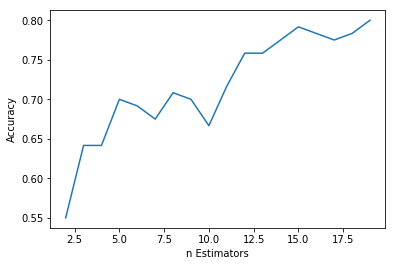

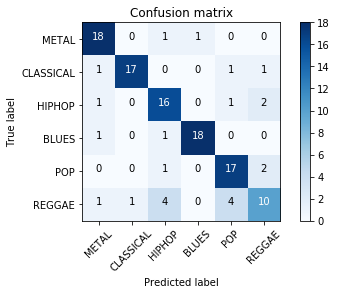

In [6]:
results_forest=[]
for i in range(2,20):
    forest=RandomForestClassifier(random_state=42,n_estimators=i)
    forest.fit(train_x,train_y)
    results_forest.append(forest.score(test_x,test_y))
    
max_accuracy_forest=max(results_forest)
best_n_est=2+results_forest.index(max(results_forest))
print("Max Accuracy is {:.3f} on test dataset with {} estimators.\n".format(max_accuracy_forest,best_n_est))

plt.plot(numpy.arange(2,20),results_forest)
plt.xlabel("n Estimators")
plt.ylabel("Accuracy")


forest=RandomForestClassifier(random_state=42,n_estimators=best_n_est)
forest.fit(train_x,train_y)
print("Training Score: {:.3f}".format(forest.score(train_x,train_y)))
print("Test score: {:.3f}".format(forest.score(test_x,test_y)))

plot_cnf(forest,test_x,test_y,GENRES)

Application of SVM algorithm and its performance analysis

Training Score: 1.000
Test score: 0.867
---------------PERFORMANCE ANALYSIS FOR THE MODEL----------------

Real Test dataset labels: 
['blues' 'blues' 'reggae' 'blues' 'hiphop' 'classical' 'classical' 'metal'
 'pop' 'metal' 'reggae' 'blues' 'classical' 'hiphop' 'blues' 'classical'
 'pop' 'hiphop' 'classical' 'classical' 'blues' 'hiphop' 'pop' 'hiphop'
 'hiphop' 'reggae' 'reggae' 'metal' 'reggae' 'blues' 'reggae' 'blues'
 'hiphop' 'metal' 'classical' 'pop' 'hiphop' 'reggae' 'classical'
 'classical' 'pop' 'classical' 'reggae' 'reggae' 'pop' 'metal' 'pop'
 'classical' 'metal' 'metal' 'hiphop' 'reggae' 'classical' 'classical'
 'metal' 'pop' 'metal' 'classical' 'classical' 'pop' 'reggae' 'pop'
 'blues' 'reggae' 'reggae' 'metal' 'metal' 'blues' 'reggae' 'metal'
 'hiphop' 'pop' 'reggae' 'classical' 'pop' 'blues' 'hiphop' 'metal'
 'hiphop' 'blues' 'reggae' 'classical' 'blues' 'metal' 'reggae' 'reggae'
 'classical' 'blues' 'pop' 'metal' 'pop' 'hiphop' 'blues' 'classical'
 'hiphop' 'metal' 'regg

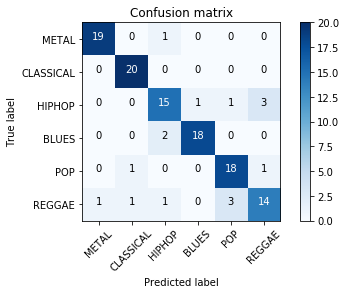

In [7]:
svm=SVC(C=100,gamma=0.08)
svm.fit(train_x,train_y)
print("Training Score: {:.3f}".format(svm.score(train_x,train_y)))
print("Test score: {:.3f}".format(svm.score(test_x,test_y)))


plot_cnf(svm,test_x,test_y,GENRES)

Application of Neural Network algorithm and its performance analysis

Training Score: 0.990
Test score: 0.825
---------------PERFORMANCE ANALYSIS FOR THE MODEL----------------

Real Test dataset labels: 
['blues' 'blues' 'reggae' 'blues' 'hiphop' 'classical' 'classical' 'metal'
 'pop' 'metal' 'reggae' 'blues' 'classical' 'hiphop' 'blues' 'classical'
 'pop' 'hiphop' 'classical' 'classical' 'blues' 'hiphop' 'pop' 'hiphop'
 'hiphop' 'reggae' 'reggae' 'metal' 'reggae' 'blues' 'reggae' 'blues'
 'hiphop' 'metal' 'classical' 'pop' 'hiphop' 'reggae' 'classical'
 'classical' 'pop' 'classical' 'reggae' 'reggae' 'pop' 'metal' 'pop'
 'classical' 'metal' 'metal' 'hiphop' 'reggae' 'classical' 'classical'
 'metal' 'pop' 'metal' 'classical' 'classical' 'pop' 'reggae' 'pop'
 'blues' 'reggae' 'reggae' 'metal' 'metal' 'blues' 'reggae' 'metal'
 'hiphop' 'pop' 'reggae' 'classical' 'pop' 'blues' 'hiphop' 'metal'
 'hiphop' 'blues' 'reggae' 'classical' 'blues' 'metal' 'reggae' 'reggae'
 'classical' 'blues' 'pop' 'metal' 'pop' 'hiphop' 'blues' 'classical'
 'hiphop' 'metal' 'regg

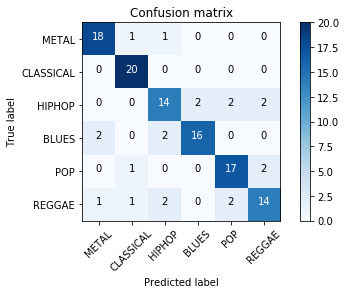

In [8]:
neural=MLPClassifier(max_iter=400,random_state=2,hidden_layer_sizes=[40,40])
neural.fit(train_x,train_y)
print("Training Score: {:.3f}".format(neural.score(train_x,train_y)))
print("Test score: {:.3f}".format(neural.score(test_x,test_y)))

plot_cnf(neural,test_x,test_y,GENRES)

***MLPClassifier achieved the highest accuracy rate on test data of 82.5%***